In [71]:
#Whether a patient likely to get a stroke. Using binary classification
#Predictor variables - selection
#Glucose level
#Outliers in the datasets
#what is the pattern in a patient who gets a stroke
#Smoking status
#Childrens' age meaning

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Loading data: calling through Kaggle Api

In [73]:
! pip install kaggle 

In [74]:
import kaggle

In [75]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [76]:
api.dataset_download_file('fedesoriano/stroke-prediction-dataset',
                          file_name='healthcare-dataset-stroke-data.csv')

False

In [77]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [78]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [79]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [80]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [81]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# EDA- Exploring and cleaning data

In [82]:
stroke.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In the bmi column out of 5110 entries, 201 are null values. This is not very acceptable to consider as a predictor variable when there are considerable amount of invalid numbers

In [84]:
stroke.isna().sum().sum()

201

In [85]:
stroke=stroke.fillna(0)

In [86]:
stroke.isna().sum().sum()

0

In [87]:
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [88]:
null_columns=stroke.columns[stroke.isnull().any()]

In [89]:
print(stroke[stroke.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


# Analysis and visualization

Looking for outliers

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

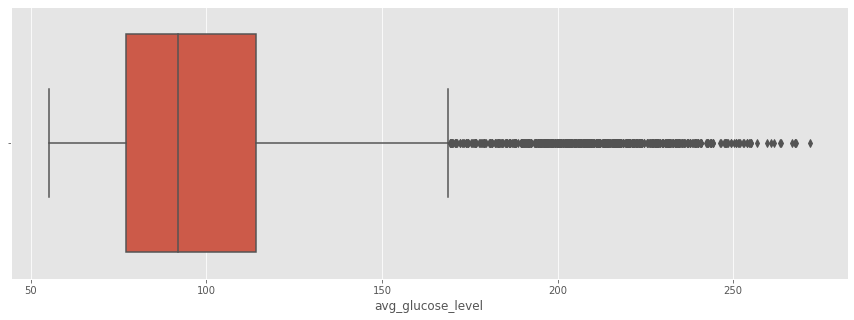

In [92]:
import seaborn as sns
sns.boxplot(stroke['avg_glucose_level'])

In [114]:
Q1 = np.percentile(stroke['avg_glucose_level'], 25, 
                   interpolation = 'midpoint') 
print(Q1)

77.25


In [115]:
Q3 = np.percentile(stroke['avg_glucose_level'], 75,
                   interpolation = 'midpoint') 
print(Q3)

114.09


In [113]:
IQR = Q3 - Q1
print(IQR)

36.84


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

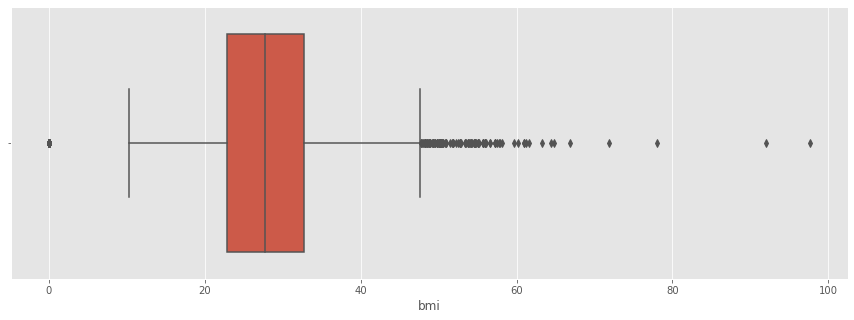

In [93]:
sns.boxplot(stroke['bmi'])

In [116]:
Q1 = np.percentile(stroke['bmi'], 25, 
                   interpolation = 'midpoint') 
print(Q1)

22.9


In [117]:
Q3 = np.percentile(stroke['bmi'], 75,
                   interpolation = 'midpoint') 
print(Q3)

32.8


In [118]:
IQR = Q3 - Q1
print(IQR)

9.899999999999999


It seems both avg_glucose_level and bmi have significant number of outliers

In [95]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [101]:
stroke['stroke'].shape, stroke['gender'].shape, stroke['hypertension'].shape, stroke['heart_disease'].shape, stroke['ever_married'].shape, stroke['work_type'].shape, stroke['Residence_type'].shape, stroke['avg_glucose_level'].shape, stroke['bmi'].shape, stroke['smoking_status'].shape

((5110,),
 (5110,),
 (5110,),
 (5110,),
 (5110,),
 (5110,),
 (5110,),
 (5110,),
 (5110,),
 (5110,))

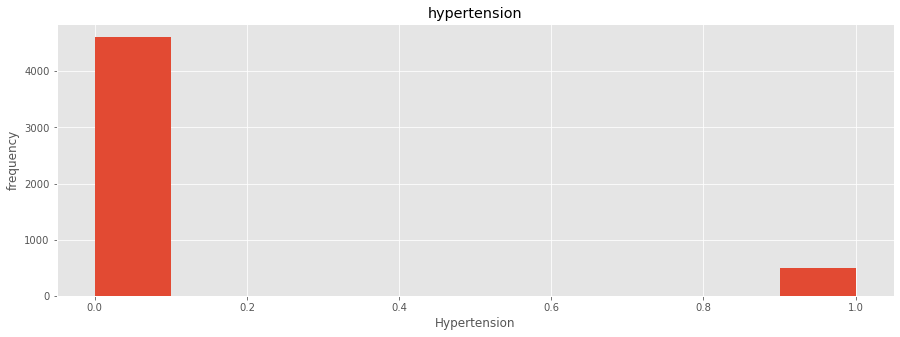

In [94]:
frame = stroke.hist('hypertension', bins= 10)

for ax in frame.flatten():
    ax.set_xlabel("Hypertension")
    ax.set_ylabel("frequency")

In [102]:
stroke['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

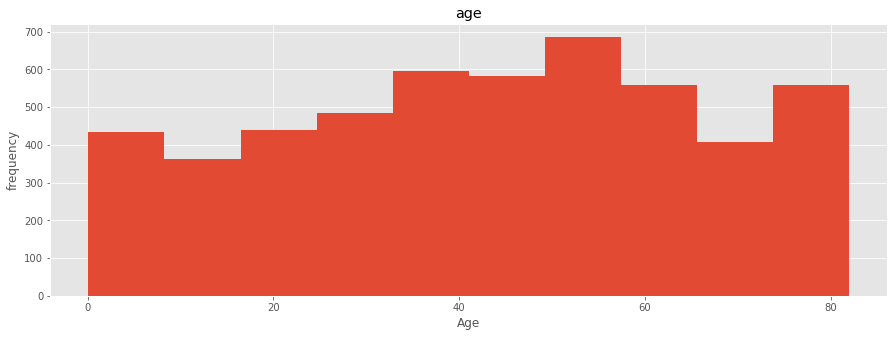

In [107]:
frame = stroke.hist('age', bins= 10)

for ax in frame.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("frequency")

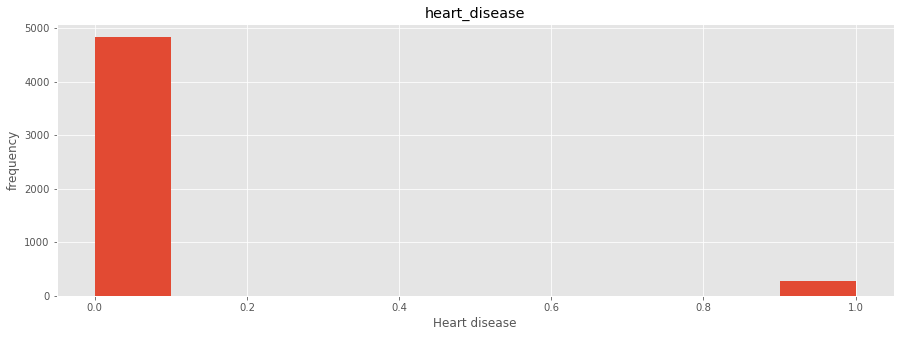

In [105]:
frame = stroke.hist('heart_disease', bins= 10)

for ax in frame.flatten():
    ax.set_xlabel("Heart disease")
    ax.set_ylabel("frequency")

In [106]:
stroke['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

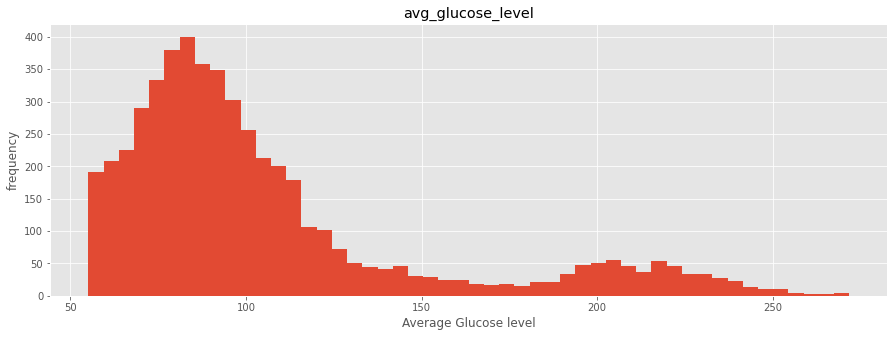

In [121]:
frame = stroke.hist('avg_glucose_level', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("Average Glucose level")
    ax.set_ylabel("frequency")

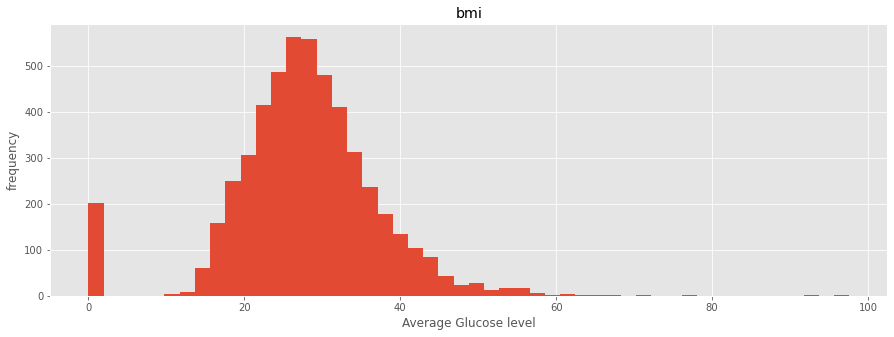

In [124]:
frame = stroke.hist('bmi', bins= 50)

for ax in frame.flatten():
    ax.set_xlabel("Average Glucose level")
    ax.set_ylabel("frequency")

In [61]:
#Feature selection

In [62]:
## Target Variable
y=stroke['stroke']
y.shape

(5110,)

In [63]:
stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [64]:
#No stroke
(4861/(4861+249))*100

95.12720156555773

In [65]:
#Stroke
(249/(4861+249))*100

4.87279843444227

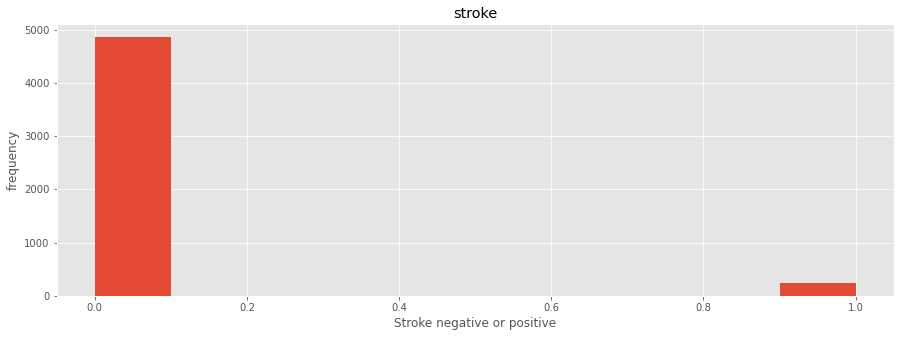

In [66]:
frame = stroke.hist('stroke', bins= 10)

for ax in frame.flatten():
    ax.set_xlabel("Stroke negative or positive")
    ax.set_ylabel("frequency")

In [68]:
#Unbalanced data- No stroke is 95.13% where as stroke is 4.87%

<AxesSubplot:>

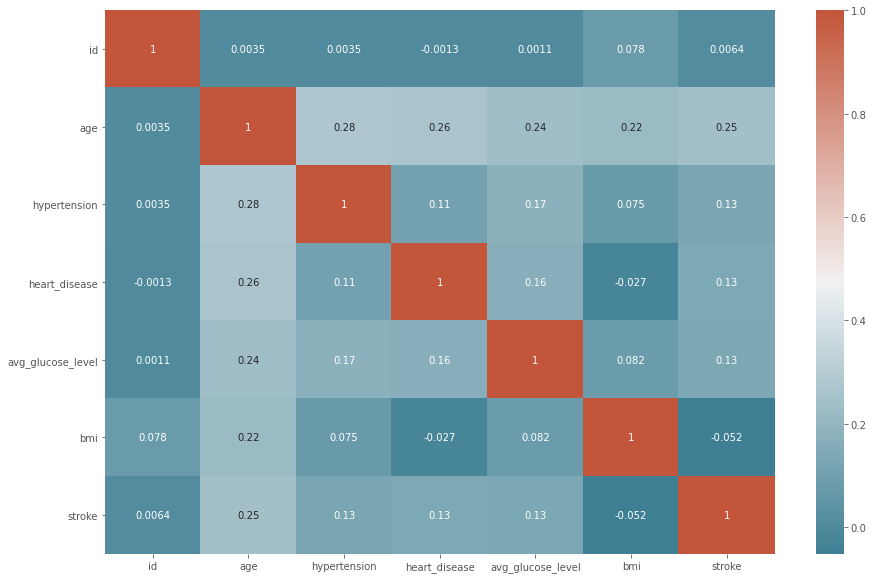

In [167]:
corr = stroke.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Looks like all the features are not highly correlated to each other. So selecting most suitable features as predictor variables. 

In [23]:
#Predictor variables 
#accroding the correlation matrix

In [125]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [126]:
X=stroke[['age', 'hypertension', 'heart_disease','avg_glucose_level','bmi']]
X,X.shape

(       age  hypertension  heart_disease  avg_glucose_level   bmi
 0     67.0             0              1             228.69  36.6
 1     61.0             0              0             202.21   0.0
 2     80.0             0              1             105.92  32.5
 3     49.0             0              0             171.23  34.4
 4     79.0             1              0             174.12  24.0
 ...    ...           ...            ...                ...   ...
 5105  80.0             1              0              83.75   0.0
 5106  81.0             0              0             125.20  40.0
 5107  35.0             0              0              82.99  30.6
 5108  51.0             0              0             166.29  25.6
 5109  44.0             0              0              85.28  26.2
 
 [5110 rows x 5 columns],
 (5110, 5))

# Logistic regression model

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [129]:
# predict test class:

X_test, X_train, y_test, y_train= train_test_split(X, y, random_state=1)
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)


# predicted test probability:
y_pred_train_prob=reg.predict_proba(X_train)
y_pred_test_prob=reg.predict_proba(X_test)

y_pred_test.shape, y_pred_test_prob.shape

(3832, 5) (1278, 5) (3832,) (1278,)


((3832,), (3832, 2))

In [130]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test, y_pred_test)

In [131]:
TP = cfm[1, 1]
TN = cfm[0, 0]
FP = cfm[0, 1]
FN = cfm[1, 0]
(TP,FP,FN,TN)

(1, 2, 173, 3656)

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
metrics.accuracy_score(y_test, y_pred_test)

0.9543319415448852

In [133]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
# 1 - metrics.accuracy_score(y_test, y_pred_test)#Classification error
classification_error

0.045668058455114825

In [134]:
recall_score(y_test, y_pred_test)

0.005747126436781609

In [135]:
sensitivity = TP / float(FN + TP)
sensitivity

0.005747126436781609

In [136]:
specificity = TN / (TN + FP)
specificity

0.9994532531437944

In [137]:
false_positive_rate = FP / float(TN + FP)
false_positive_rate

0.0005467468562055768

In [138]:
precision = TP / float(TP + FP)
precision

0.3333333333333333

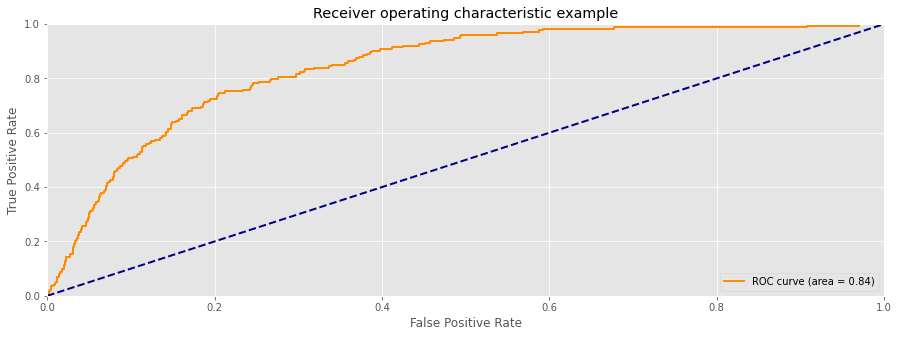

In [147]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = reg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [139]:
# Dummay variables

In [140]:
stroke2 = pd.get_dummies(data = stroke, columns = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status'], 
                                      prefix = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status'])
stroke2.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,0.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [141]:
stroke2['gender_Other'].value_counts()

0    5109
1       1
Name: gender_Other, dtype: int64

In [137]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [148]:
stroke2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   uint8  
 8   gender_Male                     5110 non-null   uint8  
 9   gender_Other                    5110 non-null   uint8  
 10  ever_married_No                 5110 non-null   uint8  
 11  ever_married_Yes                5110 non-null   uint8  
 12  work_type_Govt_job              51

<AxesSubplot:>

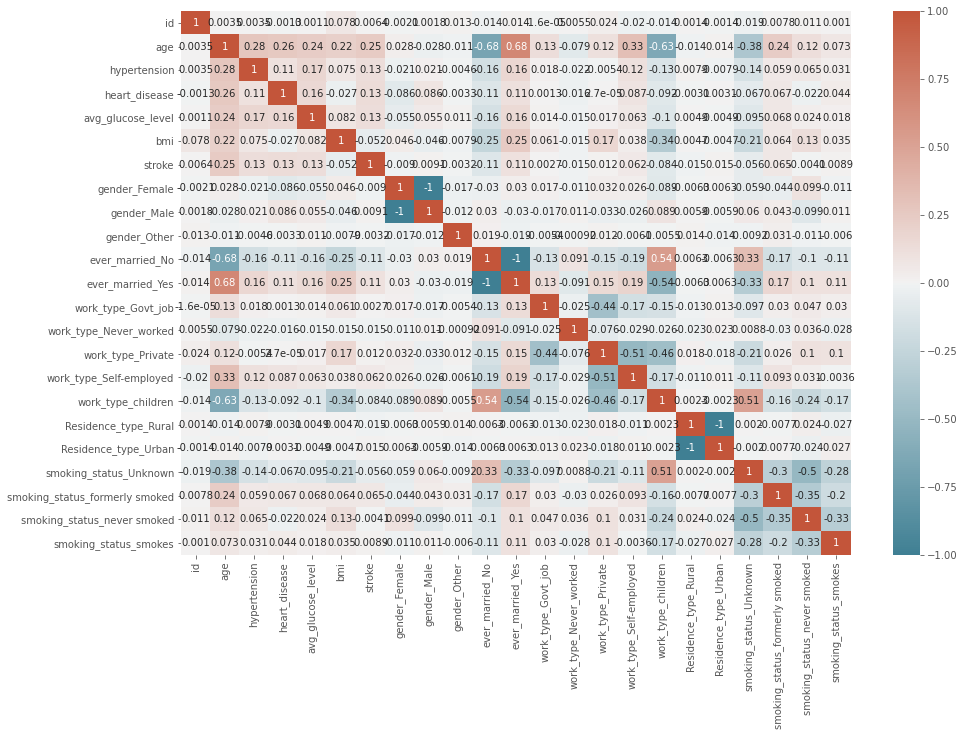

In [168]:
corr = stroke2.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [196]:
# Set Feature Both Numerical, Categorical
X2 = stroke2[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
y2 = stroke['stroke']

# Build Model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)
dumreg = LogisticRegression(max_iter=1000)

# Fit Model
dumreg.fit(X2_train, y2_train)
y2_pred_test =dumreg.predict(X2_test)
y2_pred_train =dumreg.predict(X2_train)

# Score
accuracy_score(y2_test, y2_pred_test)

(3832, 21) (1278, 21) (3832,) (1278,)


0.9413145539906104

In [304]:
cfm2=confusion_matrix(y2_test, y2_pred_test)
TP = cfm2[1, 1]
TN = cfm2[0, 0]
FP = cfm2[0, 1]
FN = cfm2[1, 0]
(TP,FP,FN,TN)

(1, 1, 74, 1202)

In [305]:
classification_error2 = (FP + FN) / float(TP + TN + FP + FN)
classification_error2

0.05868544600938967

In [306]:
recall2 = recall_score(y2_test, y2_pred_test)
recall2

0.013333333333333334

In [307]:
sensitivity2 = TP / float(FN + TP)
sensitivity2

0.013333333333333334

In [308]:
specificity2 = TN / (TN + FP)
specificity2

0.999168744804655

In [309]:
false_positive_rate2 = FP / float(TN + FP)
false_positive_rate2

0.0008312551953449709

In [310]:
precision2 = TP / float(TP + FP)
precision2

0.5

In [311]:
F1_score = 2* (precision2 * recall2) / (precision2 + recall2)
F1_score

0.025974025974025976

In [334]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y2_test, y2_pred_test)
mcc

0.07433704944323449

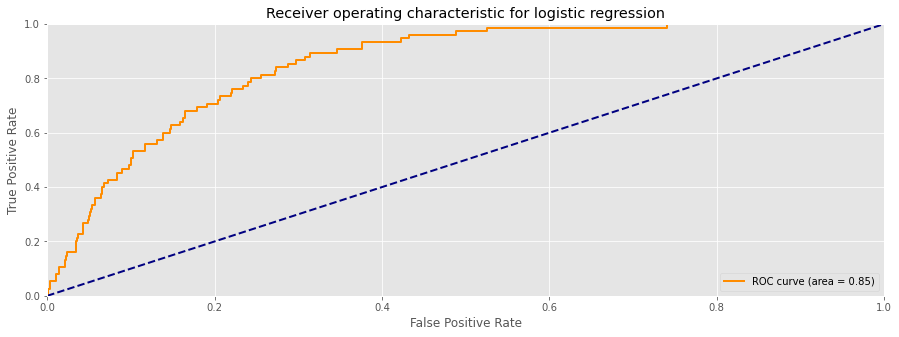

In [366]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = dumreg.predict_proba(X2_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y2_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc = "lower right")
plt.show()

# Support Vector Machine

In [348]:
# Set Feature Both Numerical, Categorical
X3 = stroke2[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
y3 = stroke2['stroke']

# Build Model
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=1)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True) #Default hyperparameters
# svc.fit(X3_train,y3_train)
# y3_pred=svc.predict(X3_test)

# Fit Model
svc.fit(X3_train, y3_train)
y3_pred_test =svc.predict(X3_test)
y3_pred_train =svc.predict(X3_train)

# Score
accuracy_score(y3_test, y3_pred_test)

(3832, 21) (1278, 21) (3832,) (1278,)


0.9413145539906104

In [349]:
cfm3=confusion_matrix(y3_test, y3_pred_test)
TP = cfm3[1, 1]
TN = cfm3[0, 0]
FP = cfm3[0, 1]
FN = cfm3[1, 0]
(TP,FP,FN,TN)

(0, 0, 75, 1203)

In [350]:
classification_error3 = (FP + FN) / float(TP + TN + FP + FN)
classification_error3

0.05868544600938967

In [351]:
recall3 = recall_score(y3_test, y3_pred_test)
recall3

0.0

In [352]:
sensitivity3 = TP / float(FN + TP)
sensitivity3

0.0

In [353]:
specificity3 = TN / (TN + FP)
specificity3

1.0

In [354]:
false_positive_rate3 = FP / float(TN + FP)
false_positive_rate3

0.0

In [355]:
precision3 = TP / float(TP + FP)
precision3

<ipython-input-355-0d8686d70e60>:1: RuntimeWarning: invalid value encountered in true_divide
  precision3 = TP / float(TP + FP)


nan

In [356]:
F1_score = 2* (precision3 * recall3) / (precision3 + recall3)
F1_score

nan

In [357]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y3_test, y3_pred_test)
mcc

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

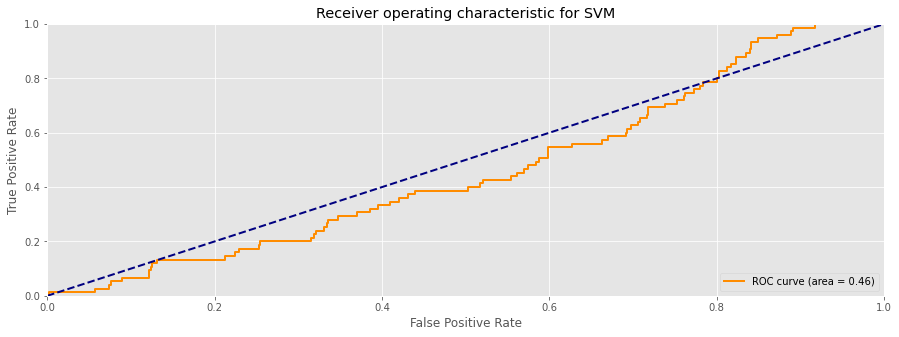

In [367]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = svc.predict_proba(X3_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y3_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc = "lower right")
plt.show()

# Naive Bayes

In [331]:
# Set Feature Both Numerical, Categorical
X4 = stroke2[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
y4 = stroke2['stroke']

# Build Model
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1)
print(X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
# gnb.fit(X4_train, y4_train)
# y4_pred=svc.predict(X4_test)

# Fit Model
gnb.fit(X4_train, y4_train)
y4_pred_test =gnb.predict(X4_test)
y4_pred_train =gnb.predict(X4_train)

# Score
accuracy_score(y4_test, y4_pred_test)

(3832, 21) (1278, 21) (3832,) (1278,)


0.5571205007824727

In [338]:
cfm4=confusion_matrix(y4_test, y4_pred_test)
TP = cfm4[1, 1]
TN = cfm4[0, 0]
FP = cfm4[0, 1]
FN = cfm4[1, 0]
(TP,FP,FN,TN)

(72, 563, 3, 640)

In [339]:
classification_error4 = (FP + FN) / float(TP + TN + FP + FN)
classification_error4

0.4428794992175274

In [340]:
recall4 = recall_score(y4_test, y4_pred_test)
recall4

0.96

In [341]:
sensitivity4 = TP / float(FN + TP)
sensitivity4

0.96

In [342]:
specificity4 = TN / (TN + FP)
specificity4

0.5320033250207814

In [343]:
false_positive_rate4 = FP / float(TN + FP)
false_positive_rate4

0.4679966749792186

In [344]:
precision4 = TP / float(TP + FP)
precision4

0.11338582677165354

In [361]:
F1_score4 = 2* (precision * recall) / (precision + recall)
F1_score4

0.13333333333333333

In [362]:
from sklearn.metrics import f1_score
f1_score4 = f1_score(y4_test, y4_pred_test) 
f1_score4

0.2028169014084507

In [363]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y4_test, y4_pred_test)
mcc

0.23128056203977093

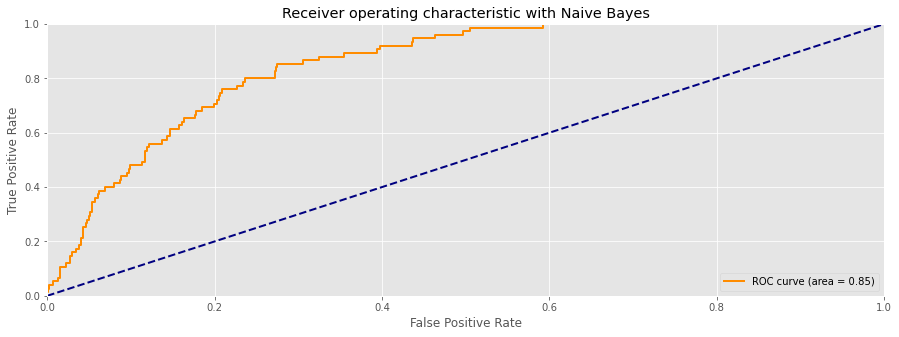

In [368]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = gnb.predict_proba(X4_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y4_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Naive Bayes')
plt.legend(loc = "lower right")
plt.show()

# Perceptron

In [303]:
# Set Feature Both Numerical, Categorical
X5 = stroke2[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
y5 = stroke2['stroke']

# Build Model
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=1)
print(X5_train.shape, X5_test.shape, y5_train.shape, y5_test.shape)

from sklearn.linear_model import Perceptron
from sklearn import metrics

clf = Perceptron(random_state=0)
clf.fit(X5_train, y5_train)

# Fit Model
clf.fit(X5_train, y5_train)
y5_pred_test =clf.predict(X5_test)
y5_pred_train =clf.predict(X5_train)

# Score
accuracy_score(y5_test, y5_pred_test)

(3832, 21) (1278, 21) (3832,) (1278,)


0.9287949921752738

In [290]:
cfm5=confusion_matrix(y5_test, y5_pred_test)
TP = cfm5[1, 1]
TN = cfm5[0, 0]
FP = cfm5[0, 1]
FN = cfm5[1, 0]
(TP,FP,FN,TN)

(7, 23, 68, 1180)

In [364]:
classification_error5 = (FP + FN) / float(TP + TN + FP + FN)
classification_error5

0.05868544600938967

In [292]:
recall = recall_score(y5_test, y5_pred_test)
recall

0.09333333333333334

In [293]:
sensitivity = TP / float(FN + TP)
sensitivity

0.09333333333333334

In [294]:
specificity = TN / (TN + FP)
specificity

0.9808811305070657

In [295]:
false_positive_rate = FP / float(TN + FP)
false_positive_rate

0.019118869492934332

In [296]:
precision = TP / float(TP + FP)
precision

0.23333333333333334

In [297]:
F1_score = 2* (precision * recall) / (precision + recall)
F1_score

0.13333333333333333

In [365]:
mcc = matthews_corrcoef(y5_test, y5_pred_test)
mcc

0.11520838258395012